<a href="https://colab.research.google.com/github/Drei8/CPE019_Zamora_Anot_PrelimExam/blob/main/Prelim_Examination_S5_Anot_%26_Zamora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Prelim Exam**

Members: Anot, Andre Jhon</br>
         Zamora, Denzel</br>
Course/Section: CPE019 - CPE32S5</br>
Date: March 10, 2024</br>
Instructor: Engr. Roman Richard

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_text
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the CSV file
data = pd.read_csv('/heart_disease_deaths.csv')

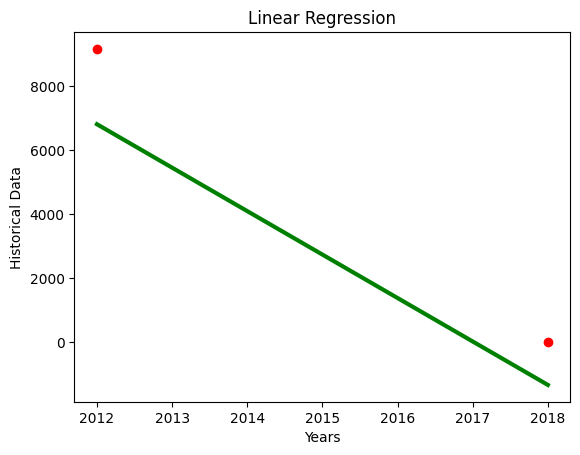

Coefficients: [-1360.52380952]
Intercept: 2744189.333333332


In [ ]:
# Linear Regression

# Assuming your CSV file has two columns: 'X' and 'Y'
X = data['Years'].values.reshape(-1, 1)  # Independent variable
y = data['Historical Data'].values  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='green', linewidth=3)
plt.xlabel('Years')
plt.ylabel('Historical Data')
plt.title('Linear Regression')
plt.show()

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

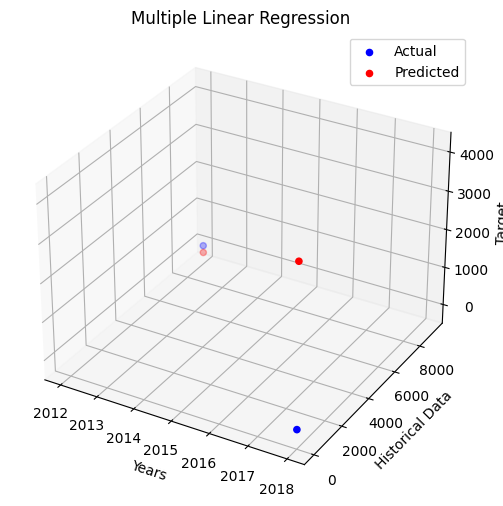

Coefficients: [1.38350722e+03 4.28674237e-01]
Intercept: -2787738.5541177136


In [ ]:
# Multiple Linear Regression

X = data[['Years', 'Historical Data']]  # Independent variables
y = data['Target']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Plot outputs
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Years'], X_test['Historical Data'], y_test, color='blue', label='Actual')
ax.scatter(X_test['Years'], X_test['Historical Data'], y_pred, color='red', label='Predicted')

ax.set_xlabel('Years')
ax.set_ylabel('Historical Data')
ax.set_zlabel('Target')
ax.set_title('Multiple Linear Regression')

plt.legend()
plt.show()

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

In [ ]:
!pip install scikit-learn

   Years  Historical Data  Target
0   2011             9434       0
1   2012             9173       0
2   2013             9703       0
3   2014                0       0
4   2015                0       0


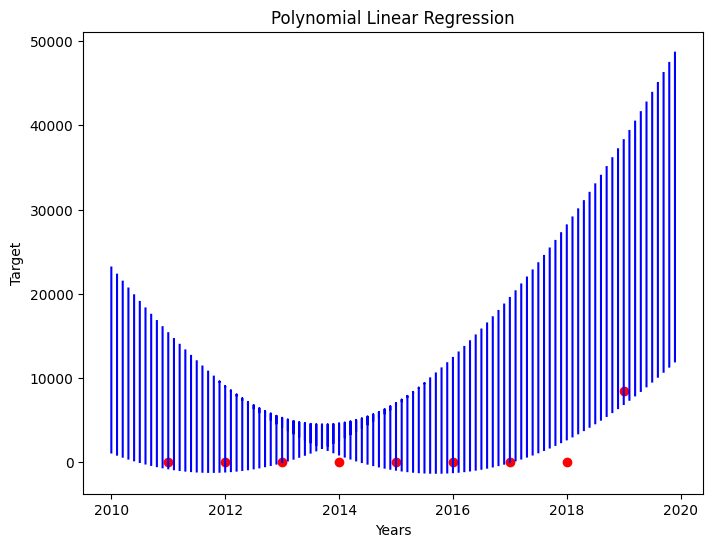

In [ ]:
# Polynomial Linear Regression

print(data.head())

X = data[['Years', 'Historical Data']] # replace 'x1', 'x2' with your feature column names
y = data['Target'] # replace 'y' with your target column name

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

plt.figure(figsize=(8, 6))
plt.scatter(X['Years'], y, c='r', marker='o')
plt.xlabel('Years')
plt.ylabel('Target')

x1_min, x1_max = X['Years'].min() - 1, X['Years'].max() + 1
x2_min, x2_max = X['Historical Data'].min() - 1, X['Historical Data'].max() + 1

x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

X_plot = np.column_stack((x1.ravel(), x2.ravel()))

y_plot = model.predict(poly.fit_transform(X_plot))

y_plot = np.reshape(y_plot, x1.shape)

plt.plot(x1, y_plot, c='b')

plt.title('Polynomial Linear Regression')
plt.show()

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[2]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


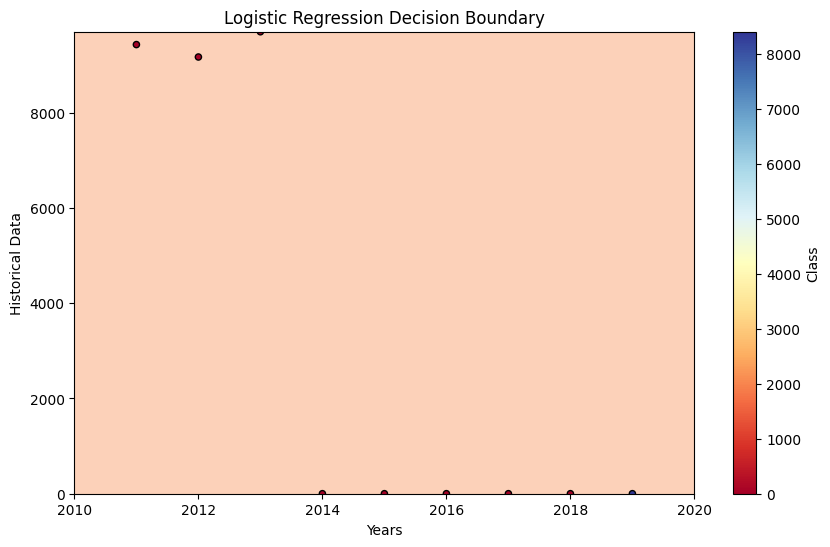

In [ ]:
# Logistic Regression

# Assuming your CSV file has two columns as features and one column as the target variable
X = data[['Years', 'Historical Data']]  # Independent variables
y = data['Target']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Years')
plt.ylabel('Historical Data')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Class')
plt.show()

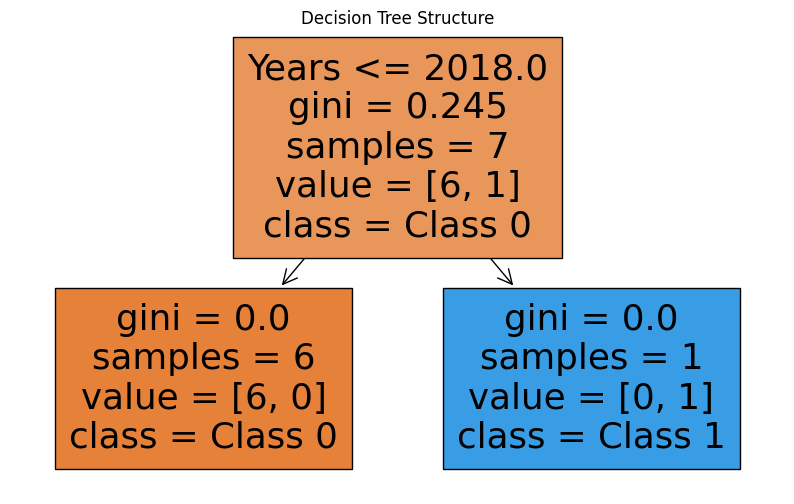

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


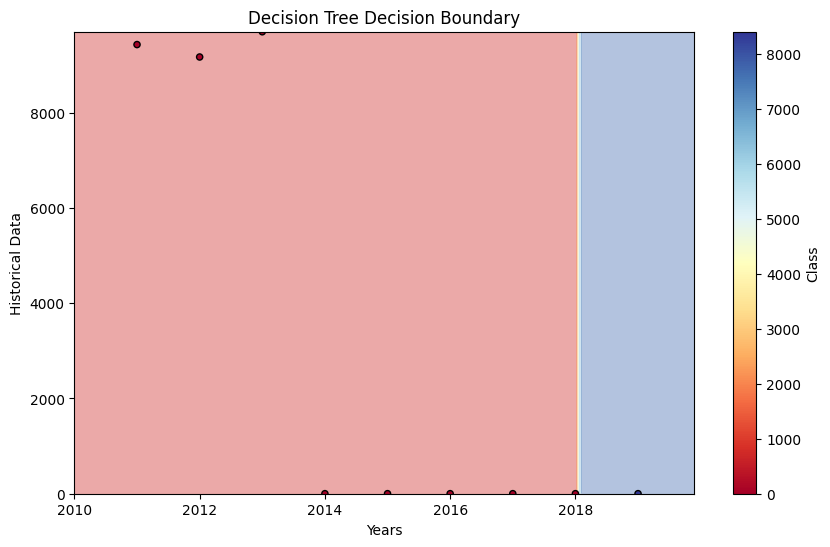

In [ ]:
# Decision Tree

# Assuming your CSV file has two columns as features and one column as the target variable
X = data[['Years', 'Historical Data']]  # Independent variables
y = data['Target']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(max_depth=3)  # Set max_depth for better visualization

# Train the model using the training sets
model.fit(X_train, y_train)

# Plot decision tree structure
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=['Years', 'Historical Data'], class_names=['Class 0', 'Class 1'], filled=True)
plt.title('Decision Tree Structure')
plt.show()

# Plot decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Years')
plt.ylabel('Historical Data')
plt.title('Decision Tree Decision Boundary')
plt.colorbar(label='Class')
plt.show()

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[2]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


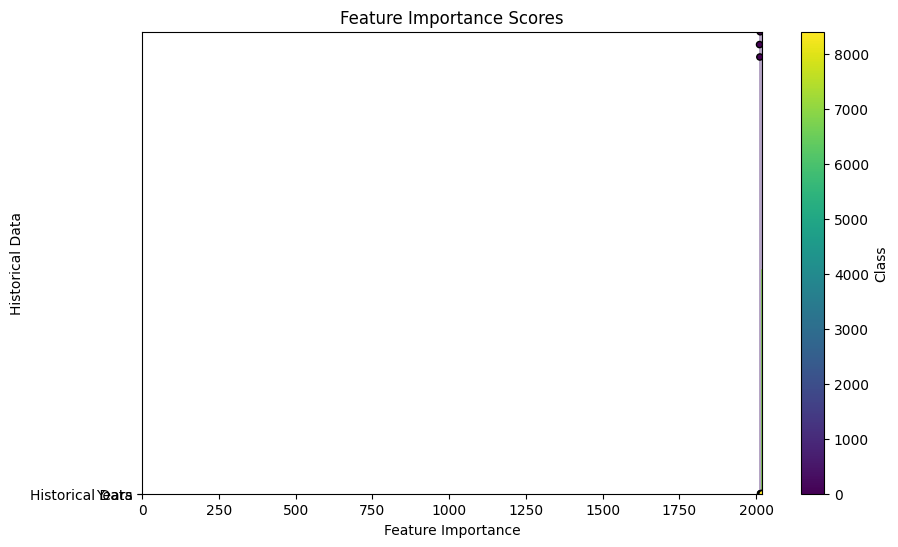

In [ ]:
# Random Forest

# Assuming your CSV file has two columns as features and one column as the target variable
X = data[['Years', 'Historical Data']]  # Independent variables
y = data['Target']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.viridis)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolors='k', cmap=plt.cm.viridis)
plt.xlabel('Years')
plt.ylabel('Historical Data')
plt.title('Random Forest Decision Boundary')
plt.colorbar(label='Class')

# Display feature importance
importance = model.feature_importances_
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

Summary:
- To summarize, linear regressions was used to predict the possible outcomes of the dataset, decision tree was used to give a simple evaluation based on the decisions and outcomes of the dataset, and the random forest was the combinations of possible decisions trees in the dataset


Conclusion:

- In conclusion, we learned how to use linear regressions as a way to predict the possible outcomes along with the decision tree and randomn forest to make decisions regarding the data. Furthermore, we plotted the outcomes of the codes for us to have a better visualization of the outcomes. It gives us a better identifiable patterns in data that shares the knowledge of how adpating from algorithms in each particular requirements for machine learning methods work.
Finally, we learned that predictive analysis gives a valuable insight how to makes of it in future events or scenario.

Lessons Learned:

- We learned how to implement these algorithms which are crucial for predicting and making decisions along with plotting for better a picture.